# Problema 1

## Funciones iniciales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones
def integrar_langevin(steps, delta_t, m=1):
    # Inicializar arrays para f(t), v(t) y x(t)
    f = np.random.uniform(-1, 1, steps)  # genera steps nùmeros alteatorios en el intervalo dado
    v = np.zeros(steps)
    x = np.zeros(steps)

    # Integrar usando el método de Euler
    for i in range(1, steps):
        v[i] = v[i-1] + (f[i] / m) * delta_t
        x[i] = x[i-1] + v[i] * delta_t

    return f, v, x

## (b) y (c)

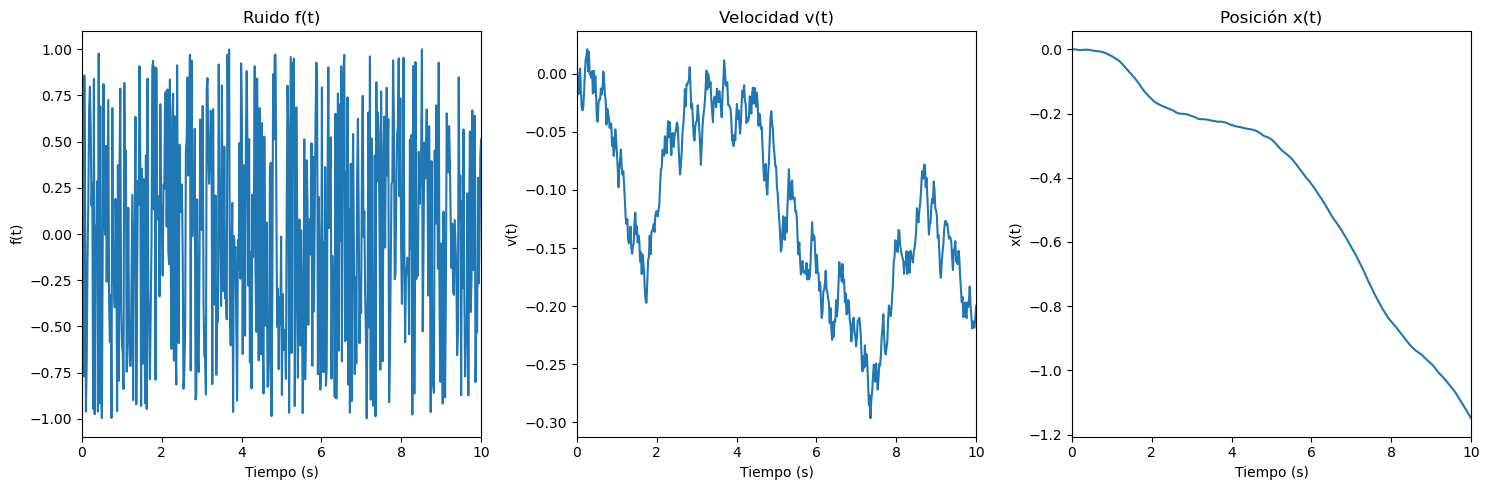

f = -0.02191799790380047
f^2 = 0.3359738966386487
v = -0.11488421837344781
v^2 = 0.018921481297318833
x = -0.4328175958106759
x^2 = 0.3067962290017812


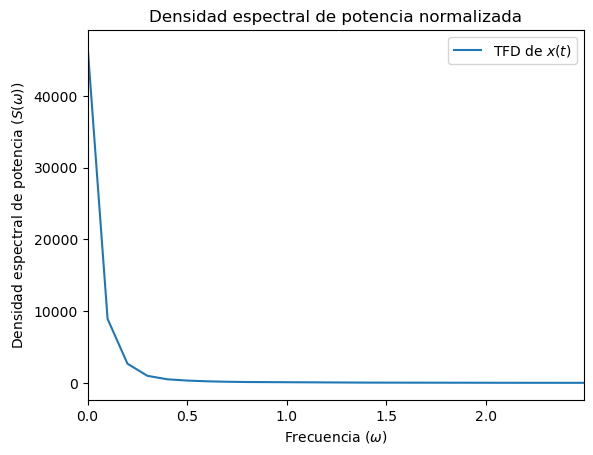

In [2]:
# Parámetros
steps = 500
delta_t = 10 / steps
# Simulación
f, v, x = integrar_langevin(steps, delta_t)

# Gráficos
t = np.linspace(0, 10, steps)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(t, f)
plt.title("Ruido f(t)")
plt.xlabel("Tiempo (s)")
plt.xlim(min(t),max(t))
plt.ylabel("f(t)")

plt.subplot(1, 3, 2)
plt.plot(t, v)
plt.title("Velocidad v(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("v(t)")
plt.xlim(min(t),max(t))

plt.subplot(1, 3, 3)
plt.plot(t, x)
plt.title("Posición x(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t)")
plt.xlim(min(t),max(t))

plt.tight_layout()
plt.savefig("Plot_1_II_b.png")
plt.show()

# Para los promedios de cada cantidad
print(f"f = {np.mean(f)}")
print(f"f^2 = {np.mean(f**2)}")
print(f"v = {np.mean(v)}")
print(f"v^2 = {np.mean(v ** 2)}")
print(f"x = {np.mean(x)}")
print(f"x^2 = {np.mean(x ** 2)}")


# Transformada de Fourier discreta (FFT)
N = len(x)  # Longitud de la serie temporal
frequencies = np.fft.fftfreq(N, delta_t)  # Frecuencias asociadas
fft_x = np.fft.fft(x)  # Transformada de Fourier
psd_x = np.abs(fft_x)**2  # Densidad espectral de potencia (PSD)

# Filtramos solo las frecuencias positivas para graficar
positive_frequencies = frequencies[frequencies >= 0]
psd_positive = psd_x[frequencies >= 0]

# Graficar la densidad espectral de potencia
plt.plot(positive_frequencies, psd_positive, label="TFD de $x(t)$")
plt.xlabel(r'Frecuencia ($\omega$)')
plt.ylabel(r'Densidad espectral de potencia ($S(\omega)$)')
plt.title(r'Densidad espectral de potencia normalizada')
plt.xlim(min(positive_frequencies), .1*max(positive_frequencies))  # Limitar el rango de frecuencias para observar el comportamiento
plt.legend()
plt.savefig("Plot_1_II_b_fft.png")
plt.show()

## (d)

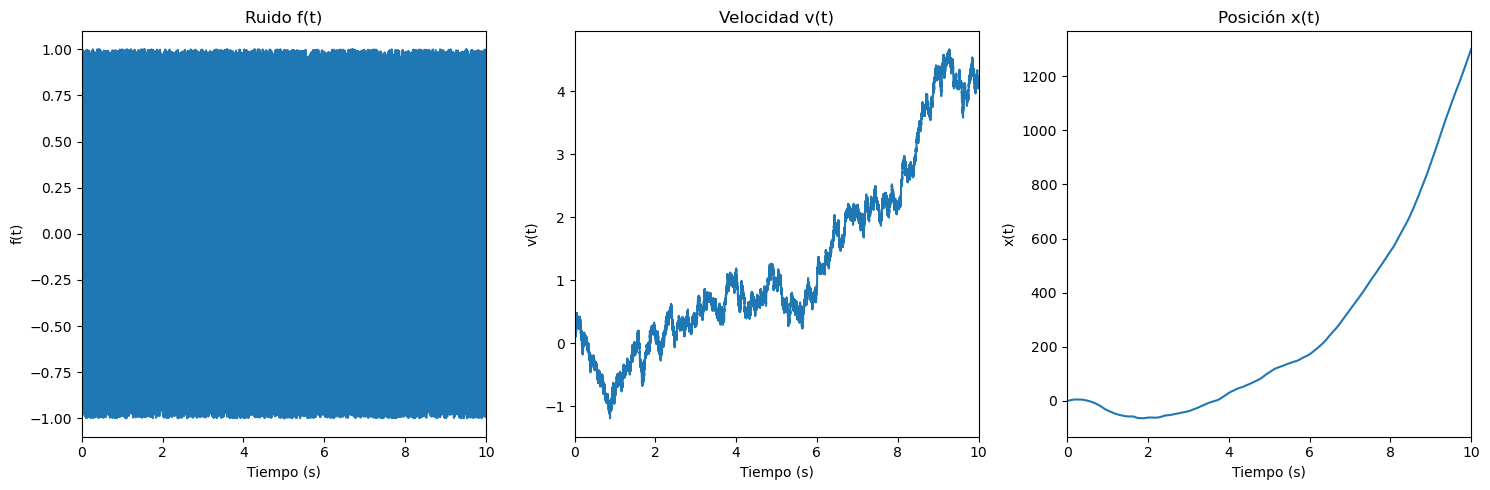

fl = 0.00414434648926765
fl^2 = 0.33516910686608187
vl = 1.2998207243929456
vl^2 = 3.849867443919864
xl = 255.55390239906097
xl^2 = 199451.37898652806


In [3]:
# Parámetros
steps_large = 50000
delta_t_large = 10 / steps
# Simulación
f_large, v_large, x_large = integrar_langevin(steps_large, delta_t_large)

# Gráficos
t_large = np.linspace(0, 10, steps_large)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(t_large, f_large)
plt.title("Ruido f(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("f(t)")
plt.xlim(min(t_large),max(t_large))

plt.subplot(1, 3, 2)
plt.plot(t_large, v_large)
plt.title("Velocidad v(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("v(t)")
plt.xlim(min(t_large),max(t_large))

plt.subplot(1, 3, 3)
plt.plot(t_large, x_large)
plt.title("Posición x(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t)")
plt.xlim(min(t_large),max(t_large))
plt.tight_layout()
plt.savefig("Plot_1_II_d.png")
plt.show()

print(f"fl = {np.mean(f_large)}")
print(f"fl^2 = {np.mean(f_large**2)}")
print(f"vl = {np.mean(v_large)}")
print(f"vl^2 = {np.mean(v_large ** 2)}")
print(f"xl = {np.mean(x_large)}")
print(f"xl^2 = {np.mean(x_large ** 2)}")

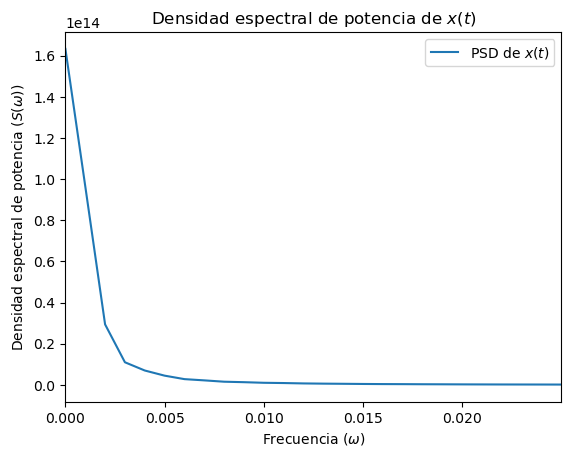

In [4]:
# Transformada de Fourier discreta (FFT)
N = len(x_large)  # Longitud de la serie temporal
frequencies = np.fft.fftfreq(N, delta_t_large)  # Frecuencias asociadas
fft_x = np.fft.fft(x_large)  # Transformada de Fourier
psd_x = np.abs(fft_x)**2  # Densidad espectral de potencia (PSD)

# Filtramos solo las frecuencias positivas para graficar
positive_frequencies = frequencies[frequencies >= 0]
psd_positive = psd_x[frequencies >= 0]

# Graficar la densidad espectral de potencia
plt.plot(positive_frequencies, psd_positive, label="PSD de $x(t)$")
plt.xlabel(r'Frecuencia ($\omega$)')
plt.ylabel(r'Densidad espectral de potencia ($S(\omega)$)')
plt.title(r'Densidad espectral de potencia de $x(t)$')
plt.xlim(min(positive_frequencies), .001*max(positive_frequencies))
plt.legend()
plt.savefig("Plot_1_II_d_fft.png")
plt.show()

# Problema 3

## (b)

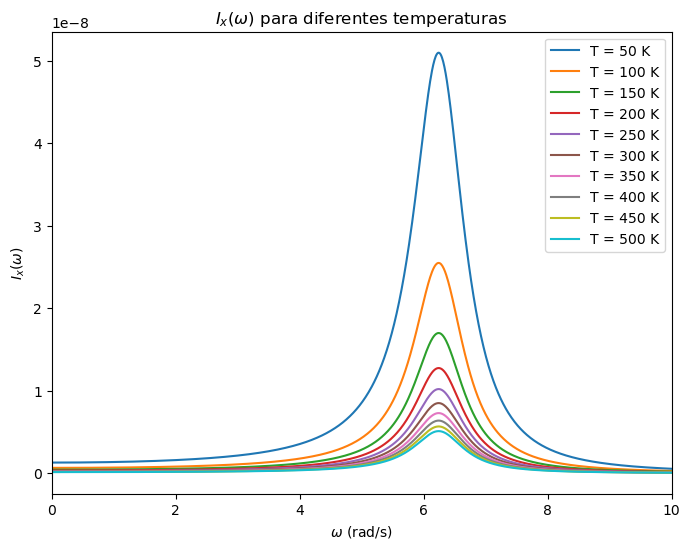

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 4 * np.pi**2
m = 1
kappa = 1e-4
b = 1

# Frecuencias angulares
omega = np.linspace(0, 10, 1000)  # Rango de frecuencias angulares

# Temperaturas para graficar
temperaturas = [50 * i for i in range(1, 11)]  # En Kelvin

# Graficar para diferentes temperaturas
plt.figure(figsize=(8, 6))
for T in temperaturas:
    lorentziana = kappa / ((k - m * omega ** 2) ** 2 + (b * omega) ** 2)
    Ix = lorentziana / T
    plt.plot(omega, Ix, label=f"T = {T} K")

    plt.title(r"$I_x(\omega)$ para diferentes temperaturas")
    plt.xlabel(r"$\omega$ (rad/s)")
    plt.ylabel(r"$I_x(\omega)$")
    plt.xlim(min(omega), max(omega))
    plt.legend()
plt.savefig("Plot_3_I_b.png")
plt.show()

## II

### (a)

In [6]:
kappa = 1e-4
delta_t = 0.01
A = np.sqrt(3 * kappa / delta_t)
print(A)

0.17320508075688773


### (b)

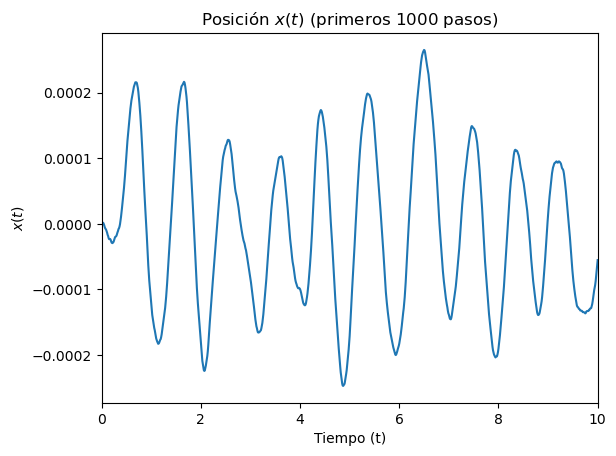

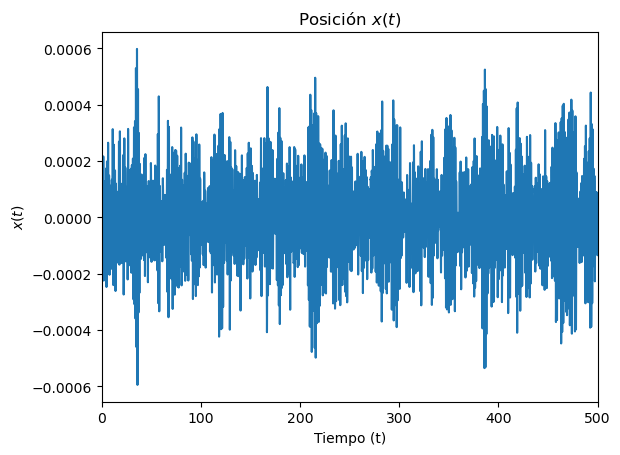

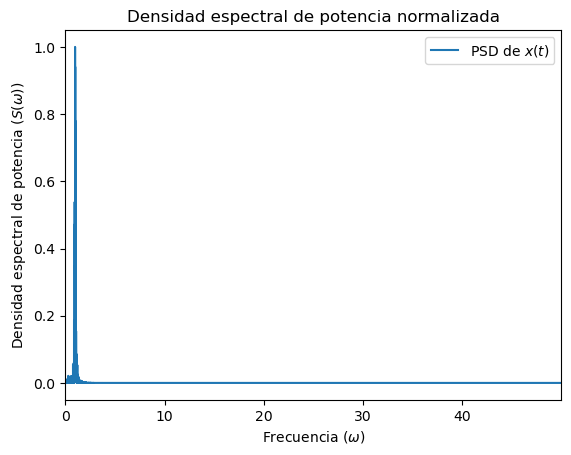

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 4 * np.pi**2  # Constante de resorte
m = 1.0           # Masa
b = 1.0           # Coeficiente de fricción
dt = 0.01         # Paso de tiempo
N_steps = 50000    # Número de pasos de tiempo
A = np.sqrt(3 * 1e-4)  # Amplitud del ruido uniforme (de la parte a)

# Inicialización de las variables
x = np.zeros(N_steps)  # Posición
v = np.zeros(N_steps)  # Velocidad
f = np.random.uniform(-A, A, N_steps)  # Ruido uniforme

# Iteración del método de Euler
for n in range(N_steps - 1):
    x[n + 1] = x[n] + v[n] * dt
    v[n + 1] = v[n] + (f[n] - (k/m)*x[n] - (b/m)*v[n]) * dt

# Tiempos
t = np.linspace(0, N_steps * dt, N_steps)

# Gráfica de la serie temporal x(t)
#plt.figure(figsize=(10, 6))
t_1000s = t[0:1000 + 1]
x_1000s = x[0:1000 + 1]
plt.plot(t_1000s, x_1000s, label='x(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel(r'$x(t)$')
plt.title(r'Posición $x(t)$ (primeros 1000 pasos)')
plt.xlim(min(t_1000s),max(t_1000s))
plt.savefig("Plot_3_II_b.png")
plt.show()


plt.plot(t, x, label='x(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel(r'$x(t)$')
plt.title(r'Posición $x(t)$')
plt.xlim(min(t),max(t))
plt.savefig("Plot_3_II_b_full.png")
plt.show()



# Transformada de Fourier discreta (FFT)
N = len(x)  # Longitud de la serie temporal
frequencies_3 = np.fft.fftfreq(N, dt)  # Frecuencias asociadas
fft_x_3 = np.fft.fft(x)  # Transformada de Fourier
psd_x_3 = np.abs(fft_x_3)**2  # Densidad espectral de potencia (PSD)

# Filtramos solo las frecuencias positivas para graficar
positive_frequencies_3 = frequencies_3[frequencies_3 >= 0]
psd_positive_3 = psd_x_3[frequencies_3 >= 0]

# Graficar la densidad espectral de potencia
plt.plot(positive_frequencies_3, psd_positive_3 / max(psd_positive_3), label="PSD de $x(t)$")
plt.xlabel(r'Frecuencia ($\omega$)')
plt.ylabel(r'Densidad espectral de potencia ($S(\omega)$)')
plt.title(r'Densidad espectral de potencia normalizada')
plt.legend()
plt.xlim(min(positive_frequencies_3), max(positive_frequencies_3))
plt.savefig("Plot_3_II_c_fft.png")
plt.show()


### (c)

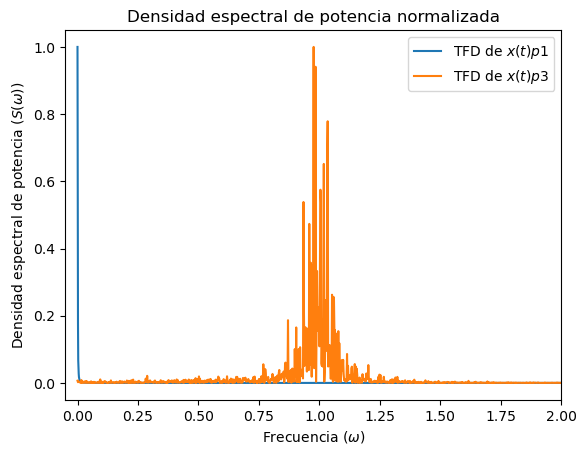

In [8]:
plt.plot(positive_frequencies, psd_positive / max(psd_positive) , label="TFD de $x(t) p1$")
plt.plot(positive_frequencies_3, psd_positive_3 / max(psd_positive_3), label="TFD de $x(t) p3$")
plt.xlabel(r'Frecuencia ($\omega$)')
plt.ylabel(r'Densidad espectral de potencia ($S(\omega)$)')
plt.title(r'Densidad espectral de potencia normalizada')
plt.legend()
plt.xlim(-0.05, 2)
plt.savefig("plot_3_II_c_merged.png")
plt.show()

### (d)

#### N = 1

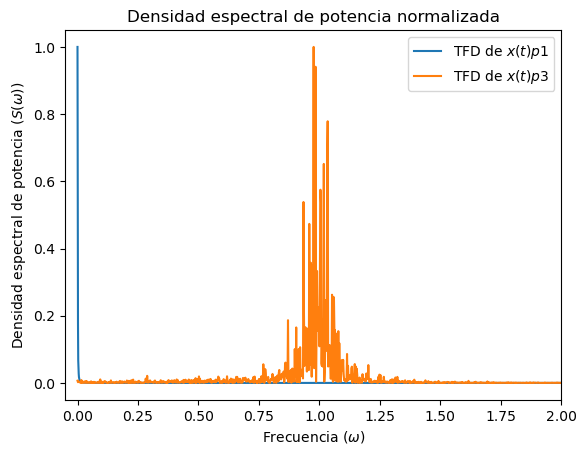

In [9]:
N_test = 1

N = len(x)  # Longitud de la serie temporal
frequencies_3 = np.fft.fftfreq(N, dt)  # Frecuencias asociadas

psd_positive_3_total = np.zeros(int(N / 2))
for _ in range(N_test):
    
    fft_x_3 = np.fft.fft(x)  # Transformada de Fourier
    psd_x_3 = np.abs(fft_x_3)**2  # Densidad espectral de potencia (PSD)

    # Filtramos solo las frecuencias positivas para graficar
    positive_frequencies_3 = frequencies_3[frequencies_3 >= 0]
    psd_positive_3 = psd_x_3[frequencies_3 >= 0]
    psd_positive_3_total = psd_positive_3_total + psd_positive_3

psd_positive_3_mean = psd_positive_3_total / N_test


plt.plot(positive_frequencies, psd_positive / max(psd_positive) , label="TFD de $x(t) p1$")
plt.plot(positive_frequencies_3, psd_positive_3_mean / max(psd_positive_3_mean), label="TFD de $x(t) p3$")
plt.xlabel(r'Frecuencia ($\omega$)')
plt.ylabel(r'Densidad espectral de potencia ($S(\omega)$)')
plt.title(r'Densidad espectral de potencia normalizada')
plt.legend()
plt.xlim(-0.05, 2)
plt.savefig("plot_3_II_d_N_1_merged.png")
plt.show()

#### N = 10

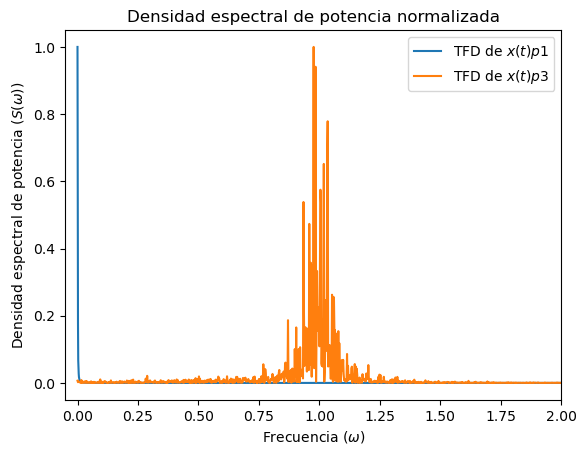

In [10]:
N_test = 10


N = len(x)  # Longitud de la serie temporal
frequencies_3 = np.fft.fftfreq(N, dt)  # Frecuencias asociadas

psd_positive_3_total = np.zeros(int(N / 2))
for _ in range(N_test):
    
    fft_x_3 = np.fft.fft(x)  # Transformada de Fourier
    psd_x_3 = np.abs(fft_x_3)**2  # Densidad espectral de potencia (PSD)

    # Filtramos solo las frecuencias positivas para graficar
    positive_frequencies_3 = frequencies_3[frequencies_3 >= 0]
    psd_positive_3 = psd_x_3[frequencies_3 >= 0]
    psd_positive_3_total = psd_positive_3_total + psd_positive_3

psd_positive_3_mean = psd_positive_3_total / N_test


plt.plot(positive_frequencies, psd_positive / max(psd_positive) , label="TFD de $x(t) p1$")
plt.plot(positive_frequencies_3, psd_positive_3_mean / max(psd_positive_3_mean), label="TFD de $x(t) p3$")
plt.xlabel(r'Frecuencia ($\omega$)')
plt.ylabel(r'Densidad espectral de potencia ($S(\omega)$)')
plt.title(r'Densidad espectral de potencia normalizada')
plt.legend()
plt.xlim(-0.05, 2)
plt.savefig("plot_3_II_d_N_10_merged.png")
plt.show()

#### N = 100

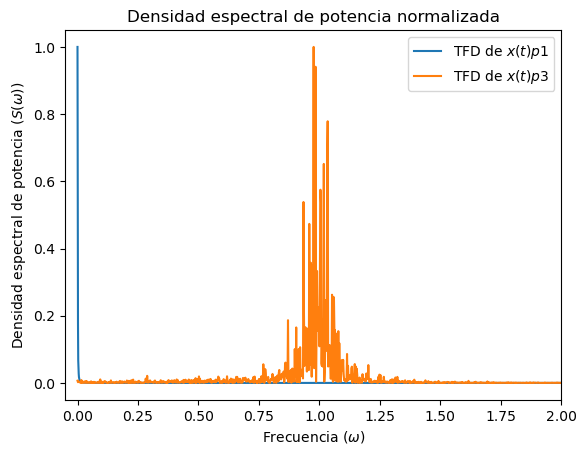

In [11]:
N_test = 100

N = len(x)  # Longitud de la serie temporal
frequencies_3 = np.fft.fftfreq(N, dt)  # Frecuencias asociadas

psd_positive_3_total = np.zeros(int(N / 2))
for _ in range(N_test):
    
    fft_x_3 = np.fft.fft(x)  # Transformada de Fourier
    psd_x_3 = np.abs(fft_x_3)**2  # Densidad espectral de potencia (PSD)

    # Filtramos solo las frecuencias positivas para graficar
    positive_frequencies_3 = frequencies_3[frequencies_3 >= 0]
    psd_positive_3 = psd_x_3[frequencies_3 >= 0]
    psd_positive_3_total = psd_positive_3_total + psd_positive_3

psd_positive_3_mean = psd_positive_3_total / N_test


plt.plot(positive_frequencies, psd_positive / max(psd_positive) , label="TFD de $x(t) p1$")
plt.plot(positive_frequencies_3, psd_positive_3_mean / max(psd_positive_3_mean), label="TFD de $x(t) p3$")
plt.xlabel(r'Frecuencia ($\omega$)')
plt.ylabel(r'Densidad espectral de potencia ($S(\omega)$)')
plt.title(r'Densidad espectral de potencia normalizada')
plt.legend()
plt.xlim(-0.05, 2)
plt.savefig("plot_3_II_d_N_100_merged.png")
plt.show()